# Understanding Datatypes in Python

## Python Integers

- The standard Python implementation is written in C. This means that every Python object is simply a cleverly disguised C structure, which contains not only its value, but other information as well.
- The integer (long) type definition effectively looks like this (once the C macros are expanded):
  - ```
    struct _longobject {
     long ob_refcnt;
     PyTypeObject *ob_type;
     size_t ob_size;
     long ob_digit[1];
    };
    ```
  - ![C vs Python Integers](images/c-vs-python-integers.png)
  - This means that there is some overhead in storing an integer in Python
- This extra information in the Python integer structure is what allows Python to be coded so freely and dynamically.
- All this additional information in Python types comes at a cost, however, which becomes especially apparent in structures that combine many of these objects

## NumPy Arrays Advantages

- At the implementation level, the array essentially contains a single pointer to one contiguous block of data.
- The Python list, on the other hand, contains a pointer to a block of pointers, each of which in turn points to a full Python object.
- Again, the advantage of the list is flexibility: because each list element is a full structure containing both data and type information, the list can be filled with data of any desired type.
- Fixed-type NumPy-style arrays lack this flexibility, but are much more efficient for storing and manipulating data.

## Creating Arrays from Lists

In [2]:
import numpy as np

In [3]:
np.array([1, 4, 3, 2, 5])

array([1, 4, 3, 2, 5])

- If types do not match, NumPy will upcast if possible (here, integers are upcast to floating point)

In [4]:
# If types do not match, NumPy will upcast if possible (here, integers are
# upcast to floating point)
np.array([3.14, 4, 2, 3])

array([3.14, 4.  , 2.  , 3.  ])

- If we want to explicitly set the data type of the resulting array, we can use the dtype keyword

In [5]:
np.array([1, 2, 3, 4], dtype='float32')

array([1., 2., 3., 4.], dtype=float32)

- Nested lists result in multidimensional arrays

In [6]:
np.array([range(i, i + 3) for i in [2, 4, 6]])

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

## Creating Arrays from Scratch

In [7]:
np.zeros(10, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [8]:
np.ones((3, 5), dtype=float)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [9]:
np.full((3, 5), 3.14)

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]])

In [10]:
np.arange(0, 20, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [11]:
np.linspace(0, 1, 6)

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [12]:
np.random.random(size=(3, 2))

array([[0.10364603, 0.59412473],
       [0.76186587, 0.73421955],
       [0.25339663, 0.8698121 ]])

In [13]:
# Create a 3x3 array of normally distributed random values
# with mean 0 and standard deviation 1
np.random.normal(0, 1, size=(3, 5))

array([[-0.04674038,  0.01659039,  1.11538711,  0.68820297,  0.63918516],
       [-0.34111817, -1.19045887,  0.92259175,  1.17717516, -0.42181103],
       [ 0.33263246, -1.92165212,  1.46811615, -1.69513291,  1.13644582]])

In [14]:
# Create a 3x3 array of random integers in the interval [0, 10)
np.random.randint(0, 10, size=(3, 4))

array([[6, 4, 2, 8],
       [3, 0, 1, 9],
       [2, 3, 4, 8]])

In [15]:
# Create a 3x3 identity matrix
np.eye(4, dtype=int)

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

In [16]:
# Create an uninitialized array of three integers
# The values will be whatever happens to already exist at that
# memory location
np.empty(3)

array([3., 2., 1.])

## NumPy Standard Datatypes

<img src="images/datatypes.png" width="500"/>

In [17]:
np.zeros(10, dtype='int16')

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int16)

In [18]:
np.zeros(10, dtype=np.int16)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int16)

# The Basics of NumPy Arrays

## NumPy Array Attributes

In [61]:
# seed for reproducibility
np.random.seed(0)

In [62]:
x1 = np.random.randint(10, size=6) # One-dimensional array
x2 = np.random.randint(10, size=(3, 4)) # Two-dimensional array
x3 = np.random.randint(10, size=(3, 4, 5)) # Three-dimensional array

In [63]:
def print_info(x, name):
    print(f"{name} info:")
    print("array:   ", x)
    print("ndim:    ", x.ndim)
    print("shape:   ", x.shape)
    print("size:    ", x.size)
    
    print("type:    ", x.dtype)
    
    print("itemsize:", x.itemsize, "bytes") # size of each element in bytes
    print("nbytes:  ", x.nbytes, "bytes") # total size in bytes
    print()

print_info(x1, "x1")
print_info(x2, "x2")
print_info(x3, "x3")

x1 info:
array:    [5 0 3 3 7 9]
ndim:     1
shape:    (6,)
size:     6
type:     int64
itemsize: 8 bytes
nbytes:   48 bytes

x2 info:
array:    [[3 5 2 4]
 [7 6 8 8]
 [1 6 7 7]]
ndim:     2
shape:    (3, 4)
size:     12
type:     int64
itemsize: 8 bytes
nbytes:   96 bytes

x3 info:
array:    [[[8 1 5 9 8]
  [9 4 3 0 3]
  [5 0 2 3 8]
  [1 3 3 3 7]]

 [[0 1 9 9 0]
  [4 7 3 2 7]
  [2 0 0 4 5]
  [5 6 8 4 1]]

 [[4 9 8 1 1]
  [7 9 9 3 6]
  [7 2 0 3 5]
  [9 4 4 6 4]]]
ndim:     3
shape:    (3, 4, 5)
size:     60
type:     int64
itemsize: 8 bytes
nbytes:   480 bytes



## Array Indexing: Accessing Single Elements

In [65]:
def print_element_1d(x, i):
    print(f"x[{i}]: {x[i]}")

print(x1)
print_element_1d(x1, 0)
print_element_1d(x1, 3)
print_element_1d(x1, -1)
print_element_1d(x1, -2)

[5 0 3 3 7 9]
x[0]: 5
x[3]: 3
x[-1]: 9
x[-2]: 7


In [68]:
def print_element_2d(x, i, j):
    print(f"x[{i}, {j}]: {x[i, j]}")

print(x2)
print_element_2d(x2, 0, 0)
print_element_2d(x2, 2, 0)
print_element_2d(x2, 2, -1)

[[3 5 2 4]
 [7 6 8 8]
 [1 6 7 7]]
x[0, 0]: 3
x[2, 0]: 1
x[2, -1]: 7


In [69]:
x2[0, 0] = 12
x2

array([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

- NumPy arrays have a fixed type. 
- This means, for example, that if you attempt to insert a floating-point value to an integer array, the value will be silently truncated.

In [114]:
print(x1)
x1[0] = 5.14159 # this will be truncated!
print(x1)

[5 0 3 3 7 9]
[5 0 3 3 7 9]


## Array Slicing: Accessing Subarrays

### One-dimensional subarrays

In [74]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [77]:
x[:5] # first five elements

array([0, 1, 2, 3, 4])

In [76]:
x[5:] # elements after index 5

array([5, 6, 7, 8, 9])

In [78]:
x[4:7]

array([4, 5, 6])

In [79]:
x[::2] # every other element

array([0, 2, 4, 6, 8])

In [80]:
x[1::2] # every other element, starting at index 1

array([1, 3, 5, 7, 9])

- A potentially confusing case is when the step value is negative. 
- In this case, the defaults for start and stop are swapped. 
- This becomes a convenient way to reverse an array

In [86]:
x[::-1] # all elements, reversed

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [83]:
x[5::-2] # reversed every other from index 5

array([5, 3, 1])

### Multidimensional subarrays

- Multidimensional slices work in the same way, with multiple slices separated by commas.

In [110]:
x2

array([[100,   5,   2,   4],
       [  7,   6,   8,   8],
       [  1,   6,   7,   7]])

In [111]:
x2[:2, :3] # two rows, three columns

array([[100,   5,   2],
       [  7,   6,   8]])

In [112]:
x2[:3, ::2] # all rows, every other column

array([[100,   2],
       [  7,   8],
       [  1,   7]])

In [113]:
x2[::-1, ::-1] # reversed in both dimensions

array([[  7,   7,   6,   1],
       [  8,   8,   6,   7],
       [  4,   2,   5, 100]])

### Accessing array rows and columns

- One commonly needed routine is accessing single rows or columns of an array.
- You can do this by combining indexing and slicing, using an empty slice marked by a single colon (:)

In [107]:
x2

array([[100,   5,   2,   4],
       [  7,   6,   8,   8],
       [  1,   6,   7,   7]])

In [95]:
x2[:, 0] # first column of x2

array([12,  7,  1])

In [96]:
x2[0, :] # first row of x2

array([12,  5,  2,  4])

In [97]:
x2[0] # equivalent to x2[0, :]

array([12,  5,  2,  4])

### Subarrays as no-copy views

- Array slices return views rather than copies of the array data.
- This is one area in which NumPy array slicing differs from Python list slicing: in lists, slices will be copies.

In [103]:
x2

array([[100,   5,   2,   4],
       [  7,   6,   8,   8],
       [  1,   6,   7,   7]])

In [104]:
x2_sub = x2[:2, :2]
x2_sub

array([[100,   5],
       [  7,   6]])

In [105]:
x2_sub[0, 0] = 100
x2

array([[100,   5,   2,   4],
       [  7,   6,   8,   8],
       [  1,   6,   7,   7]])

In [106]:
x2

array([[100,   5,   2,   4],
       [  7,   6,   8,   8],
       [  1,   6,   7,   7]])

### Creating copies of arrays

- Copying can be most easily done with the copy() method

In [118]:
x2

array([[100,   5,   2,   4],
       [  7,   6,   8,   8],
       [  1,   6,   7,   7]])

In [119]:
x2_sub_copy = x2[:2, :2].copy()
x2_sub_copy

array([[100,   5],
       [  7,   6]])

In [120]:
x2_sub_copy[0, 0] = 42
x2_sub_copy

array([[42,  5],
       [ 7,  6]])

In [121]:
x2

array([[100,   5,   2,   4],
       [  7,   6,   8,   8],
       [  1,   6,   7,   7]])

## Reshaping of Arrays

In [123]:
grid = np.arange(1, 10)
grid

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [124]:
grid.reshape((3, 3))

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

- Another common reshaping pattern is the conversion of a one-dimensional array into a two-dimensional row or column matrix.
- You can do this with the reshape method, or more easily by making use of the newaxis keyword within a slice operation

In [126]:
x = np.array([1, 2, 3])
x.reshape((1, 3))

array([[1, 2, 3]])

In [132]:
x[np.newaxis, :] # (3,) becomes (1, 3)

array([[1, 2, 3]])

In [133]:
x.reshape((3, 1))

array([[1],
       [2],
       [3]])

In [134]:
x[:, np.newaxis] # (3,) shape becomes (3, 1)

array([[1],
       [2],
       [3]])

## Array Concatenation and Splitting

### Array Concatenation

In [135]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
np.concatenate([x, y])

array([1, 2, 3, 3, 2, 1])

In [136]:
z = [99, 99, 99]
np.concatenate([x, y, z])

array([ 1,  2,  3,  3,  2,  1, 99, 99, 99])

In [139]:
grid = np.array([[1, 2, 3],
                 [4, 5, 6]])
grid

array([[1, 2, 3],
       [4, 5, 6]])

In [138]:
# concatenate along the first axis
np.concatenate([grid, grid])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [140]:
# concatenate along the second axis (zero-indexed)
np.concatenate([grid, grid], axis=1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

For working with arrays of mixed dimensions, it can be clearer to use the np.vstack
(vertical stack) and np.hstack (horizontal stack) functions

In [145]:
x = np.array([1, 2, 3])
grid = np.array([[9, 8, 7],
                 [6, 5, 4]])
display(x)
display(grid)

array([1, 2, 3])

array([[9, 8, 7],
       [6, 5, 4]])

In [144]:
# vertically stack the arrays
np.vstack([x, grid])

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

In [146]:
y = np.array([[99],
            [99]])
y

array([[99],
       [99]])

In [148]:
# horizontally stack the arrays
np.hstack([grid, y])

array([[ 9,  8,  7, 99],
       [ 6,  5,  4, 99]])

Similarly, np.dstack will stack arrays along the third axis.

### Splitting of arrays

- The opposite of concatenation is splitting, which is implemented by the functions
np.split, np.hsplit, and np.vsplit.
- For each of these, we can pass a list of indices
giving the split points.

In [198]:
x = np.array([1, 2, 3, 99, 99, 3, 2, 1])
x

array([ 1,  2,  3, 99, 99,  3,  2,  1])

In [199]:
x1, x2, x3 = np.split(x, [3, 5])
print(x1, x2, x3)

[1 2 3] [99 99] [3 2 1]


N split points lead to N + 1 subarrays. The related functions np.hsplit
and np.vsplit are similar.

In [200]:
grid = np.arange(16).reshape((4, 4))
grid

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [201]:
upper, lower = np.vsplit(grid, [2])
print(upper)
print(lower)

[[0 1 2 3]
 [4 5 6 7]]
[[ 8  9 10 11]
 [12 13 14 15]]


In [202]:
left, right = np.hsplit(grid, [2])
print(left)
print(right)

[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]]
[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]


Similarly, np.dsplit will split arrays along the third axis.

# Computation on NumPy Arrays: Universal Functions

- Computation on NumPy arrays can be very fast, or it can be very slow.
- The key to making it fast is to use vectorized operations, generally implemented through NumPy’s universal functions (ufuncs).

## The Slowness of Loops

- Python’s default implementation (known as CPython) does some operations very slowly.
- This is in part due to the dynamic, interpreted nature of the language: the fact that types are flexible.

In [155]:
# Finding reciprocals
np.random.seed(42)

def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output
    
values = np.random.randint(1, 10, size=5)
display(values)
display(compute_reciprocals(values))

array([7, 4, 8, 5, 7])

array([0.14285714, 0.25      , 0.125     , 0.2       , 0.14285714])

In [175]:
big_array = np.random.randint(1, 100, size=1000000)
%timeit compute_reciprocals(big_array)

598 ms ± 9.84 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


- It turns out that the bottleneck here is not the operations themselves.
- But the type-checking and function dispatches that CPython must do at each cycle of the loop.
- Each time the reciprocal is computed, Python first examines the object’s type and does a dynamic lookup of the correct function to use for that type.

## UFuncs

- For many types of operations, NumPy provides a convenient interface into just this
kind of statically typed, compiled routine.
- This is known as a vectorized operation.

In [161]:
display(values)
display(compute_reciprocals(values))
display(1.0 / values)

array([7, 4, 8, 5, 7])

array([0.14285714, 0.25      , 0.125     , 0.2       , 0.14285714])

array([0.14285714, 0.25      , 0.125     , 0.2       , 0.14285714])

In [176]:
big_array = np.random.randint(1, 100, size=1000000)
%timeit compute_reciprocals(big_array)

589 ms ± 9.24 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [177]:
%timeit (1.0 / big_array)

656 μs ± 79.4 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [178]:
# UFuncs between two arrays
np.arange(5) / np.arange(1, 6)

array([0.        , 0.5       , 0.66666667, 0.75      , 0.8       ])

In [180]:
x = np.arange(9).reshape((3, 3))
display(x)
display(2 ** x)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

array([[  1,   2,   4],
       [  8,  16,  32],
       [ 64, 128, 256]])

- Computations using vectorization through ufuncs are nearly always more efficient
than their counterpart implemented through Python loops, especially as the arrays
grow in size.
- Any time you see such a loop in a Python script, you should consider
whether it can be replaced with a vectorized expression.

## Exploring NumPy’s UFuncs

### Array arithmetic

In [188]:
x = np.arange(4)
print("x =", x)
print("x + 5 =", x + 5)
print("x - 5 =", x - 5)
print("x * 2 =", x * 2)
print()

print("x / 2 =", x / 2)
print("x // 2 =", x // 2) # floor division
print()

print("-x = ", -x)
print("x ** 2 = ", x ** 2)
print("x % 2 = ", x % 2)

x = [0 1 2 3]
x + 5 = [5 6 7 8]
x - 5 = [-5 -4 -3 -2]
x * 2 = [0 2 4 6]

x / 2 = [0.  0.5 1.  1.5]
x // 2 = [0 0 1 1]

-x =  [ 0 -1 -2 -3]
x ** 2 =  [0 1 4 9]
x % 2 =  [0 1 0 1]


In [190]:
-(0.5*x + 1) ** 2

array([-1.  , -2.25, -4.  , -6.25])

<img src="images/arithmetic-operations.png" width="500"/>

### Absolute value

In [191]:
x = np.array([-2, -1, 0, 1, 2])
x

array([-2, -1,  0,  1,  2])

In [192]:
abs(x)

array([2, 1, 0, 1, 2])

In [193]:
np.absolute(x)

array([2, 1, 0, 1, 2])

In [194]:
np.abs(x)

array([2, 1, 0, 1, 2])

In [195]:
# Complex values
x = np.array([3 - 4j, 4 - 3j, 2 + 0j, 0 + 1j])
np.abs(x)

array([5., 5., 2., 1.])

### Trigonometric functions

In [204]:
theta = np.linspace(0, np.pi, 3)

In [205]:
print("theta = ", theta)
print("sin(theta) = ", np.sin(theta))
print("cos(theta) = ", np.cos(theta))
print("tan(theta) = ", np.tan(theta))

theta =  [0.         1.57079633 3.14159265]
sin(theta) =  [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) =  [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) =  [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


In [206]:
x = np.array([-1, 0, 1])
x

array([-1,  0,  1])

In [209]:
# Inverse trigonometric
print("x = ", x)
print("arcsin(x) = ", np.arcsin(x))
print("arccos(x) = ", np.arccos(x))
print("arctan(x) = ", np.arctan(x))

x =  [-1  0  1]
arcsin(x) =  [-1.57079633  0.          1.57079633]
arccos(x) =  [3.14159265 1.57079633 0.        ]
arctan(x) =  [-0.78539816  0.          0.78539816]


### Exponents and logarithms

In [210]:
x = np.array([1, 2, 3])
print("x =", x)
print("e^x =", np.exp(x))
print("2^x =", np.exp2(x))
print("3^x =", np.power(3, x))

x = [1 2 3]
e^x = [ 2.71828183  7.3890561  20.08553692]
2^x = [2. 4. 8.]
3^x = [ 3  9 27]


In [211]:
x = [1, 2, 4, 10]
print("x =", x)
print("ln(x) =", np.log(x))
print("log2(x) =", np.log2(x))
print("log10(x) =", np.log10(x))

x = [1, 2, 4, 10]
ln(x) = [0.         0.69314718 1.38629436 2.30258509]
log2(x) = [0.         1.         2.         3.32192809]
log10(x) = [0.         0.30103    0.60205999 1.        ]


There are also some specialized versions that are useful for maintaining precision
with very small input

In [214]:
x = [0, 0.001, 0.01, 0.1]
print("x =", x)
print("exp(x) - 1 =", np.expm1(x))
print("log(1 + x) =", np.log1p(x))

x = [0, 0.001, 0.01, 0.1]
exp(x) - 1 = [0.         0.0010005  0.01005017 0.10517092]
log(1 + x) = [0.         0.0009995  0.00995033 0.09531018]


### Specialized ufuncs

In [215]:
from scipy import special

In [216]:
# Gamma functions (generalized factorials) and related functions
x = [1, 5, 10]
print("x =", x)
print("gamma(x) =", special.gamma(x))
print("ln|gamma(x)| =", special.gammaln(x))
print("beta(x, 2) =", special.beta(x, 2))

x = [1, 5, 10]
gamma(x) = [1.0000e+00 2.4000e+01 3.6288e+05]
ln|gamma(x)| = [ 0.          3.17805383 12.80182748]
beta(x, 2) = [0.5        0.03333333 0.00909091]


In [217]:
# Error function (integral of Gaussian)
# its complement, and its inverse
x = np.array([0, 0.3, 0.7, 1.0])
print("x =", x)
print("erf(x) =", special.erf(x))
print("erfc(x) =", special.erfc(x))
print("erfinv(x) =", special.erfinv(x))

x = [0.  0.3 0.7 1. ]
erf(x) = [0.         0.32862676 0.67780119 0.84270079]
erfc(x) = [1.         0.67137324 0.32219881 0.15729921]
erfinv(x) = [0.         0.27246271 0.73286908        inf]


## Advanced Ufunc Features

### Specifying output

- For large calculations, it is sometimes useful to be able to specify the array where the
result of the calculation will be stored.
- Rather than creating a temporary array, you
can use this to write computation results directly to the memory location where you’d
like them to be.
- For all ufuncs, you can do this using the out argument of the
function

In [218]:
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out=y)
y

array([ 0., 10., 20., 30., 40.])

- This can even be used with array views. For example, we can write the results of a
computation to every other element of a specified array

In [222]:
y = np.zeros(10)
print("x =", x)
np.power(2, x, out=y[::2])
print("y =", y)

x = [0 1 2 3 4]
y = [ 1.  0.  2.  0.  4.  0.  8.  0. 16.  0.]


- If we had instead written y[::2] = 2 ** x, this would have resulted in the creation
of a temporary array to hold the results of 2 ** x, followed by a second operation
copying those values into the y array.
- This doesn’t make much of a difference for such
a small computation, but for very large arrays the memory savings from careful use of
the out argument can be significant.

### Aggregates

In [224]:
x = np.arange(1, 6)
x

array([1, 2, 3, 4, 5])

In [225]:
np.add.reduce(x)

15

In [226]:
np.multiply.reduce(x)

120

- If we’d like to store all the intermediate results of the computation, we can instead use
accumulate:

In [227]:
np.add.accumulate(x)

array([ 1,  3,  6, 10, 15])

In [228]:
np.multiply.accumulate(x)

array([  1,   2,   6,  24, 120])

### Outer Products

- Any ufunc can compute the output of all pairs of two different inputs using
the outer method.
- This allows you, in one line, to do things like create a multiplication table

In [239]:
x = np.arange(1, 6)
x

array([1, 2, 3, 4, 5])

In [240]:
np.multiply.outer(x, x)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

# Aggregations: Min, Max, and Everything in Between

## Summing the Values in an Array

In [249]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

print(sum(big_array))
print(np.sum(big_array))

33.7 ms ± 47.9 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
133 μs ± 3.2 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
500128.1154435019
500128.11544350436


## Minimum and Maximum

### Python min vs NumPy min 

In [250]:
%timeit min(big_array)
%timeit np.min(big_array)

24.8 ms ± 349 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
82.7 μs ± 3.09 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [251]:
# Shorter syntax
print(big_array.min(), big_array.max(), big_array.sum())

1.9779318078949615e-06 0.9999988203030113 500128.11544350436


### Multidimensional aggregates

In [253]:
M = np.random.random((3, 4))
M

array([[0.26922747, 0.96501936, 0.81768602, 0.23408635],
       [0.17546994, 0.49582207, 0.44834524, 0.57803098],
       [0.93051417, 0.72046422, 0.74335077, 0.55374189]])

In [254]:
M.sum()

6.931758471013959

In [255]:
M.sum(axis=0)

array([1.37521159, 2.18130564, 2.00938203, 1.36585921])

In [256]:
M.min(axis=1)

array([0.23408635, 0.17546994, 0.55374189])

In [257]:
M.argmin(axis=1)

array([3, 0, 3])

- The axis keyword specifies the dimension of the array that will be collapsed,
rather than the dimension that will be returned.
- So specifying axis=0 means that the
first axis will be collapsed: for two-dimensional arrays, this means that values within
each column will be aggregated.

### Other aggregation functions

- Most aggregates have a NaN-safe counterpart that computes
the result while ignoring missing values, which are marked by the special IEEE
floating-point NaN value
- <img src="images/aggregate-functions.png" width="500" />

## Example: What Is the Average Height of US Presidents?

In [258]:
!head -4 data/president_heights.csv

order,name,height(cm)
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189


In [260]:
import pandas as pd
data = pd.read_csv('data/president_heights.csv')
heights = np.array(data['height(cm)'])
heights

array([189, 170, 189, 163, 183, 171, 185, 168, 173, 183, 173, 173, 175,
       178, 183, 193, 178, 173, 174, 183, 183, 168, 170, 178, 182, 180,
       183, 178, 182, 188, 175, 179, 183, 193, 182, 183, 177, 185, 188,
       188, 182, 185])

In [263]:
print("Mean height:       ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height:    ", heights.min())
print("Maximum height:    ", heights.max())

Mean height:        179.73809523809524
Standard deviation: 6.931843442745892
Minimum height:     163
Maximum height:     193


In [264]:
print("25th percentile: ", np.percentile(heights, 25))
print("Median:          ", np.median(heights))
print("75th percentile: ", np.percentile(heights, 75))

25th percentile:  174.25
Median:           182.0
75th percentile:  183.0


In [265]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # set plot style

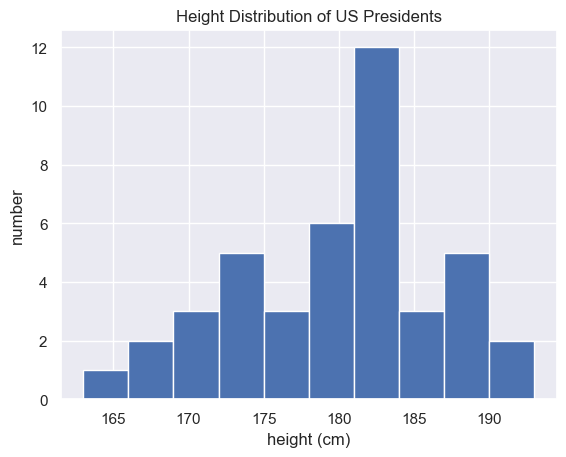

In [267]:
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number')
plt.show()

# Computation on Arrays: Broadcasting

- Broadcasting is simply a
set of rules for applying binary ufuncs (addition, subtraction, multiplication, etc.) on
arrays of different sizes.

## Introducing Broadcasting

In [275]:
a = np.arange(5, 8); a

array([5, 6, 7])

In [276]:
a + 5

array([10, 11, 12])

- We can think of this as an operation that stretches or duplicates the value 5 into the
array [5, 5, 5], and adds the results.
- The advantage of NumPy’s broadcasting is that
this duplication of values does not actually take place, but it is a useful mental model
as we think about broadcasting.

In [289]:
# Higher dimensions
np.random.seed(42)
M = np.random.randint(10, size=(3, 3));

print(M)
print(a)
print(M + a)

[[6 3 7]
 [4 6 9]
 [2 6 7]]
[5 6 7]
[[11  9 14]
 [ 9 12 16]
 [ 7 12 14]]


In [292]:
# more complicated cases can involve broadcasting of both arrays
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]
print(a)
print(b)
print(a + b)

[0 1 2]
[[0]
 [1]
 [2]]
[[0 1 2]
 [1 2 3]
 [2 3 4]]


<img src="images/broadcasting.png" width="400"/>

## Rules of Broadcasting

Broadcasting in NumPy follows a strict set of rules to determine the interaction
between the two arrays:
1. If the two arrays differ in their number of dimensions, the shape of the
one with fewer dimensions is padded with ones on its leading (left) side.
2. If the shape of the two arrays does not match in any dimension, the array
with shape equal to 1 in that dimension is stretched to match the other shape.
3. If in any dimension the sizes disagree and neither is equal to 1, an error is
raised

### Broadcasting example 1

In [295]:
M = np.ones((2, 3))
a = np.arange(3)

print(M)
print(M.shape)
print(a)
print(a.shape)

[[1. 1. 1.]
 [1. 1. 1.]]
(2, 3)
[0 1 2]
(3,)


- Initially
  - M.shape is (2, 3)
  - a.shape is (3,)
- By rule 1
  - M.shape -> (2, 3)
  - a.shape -> (1, 3)
- By rule 2
  - M.shape -> (2, 3)
  - a.shape -> (2, 3)

In [296]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

### Broadcasting example 2

In [297]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)

In [299]:
print(a)
print(a.shape)

[[0]
 [1]
 [2]]
(3, 1)


In [300]:
print(b)
print(b.shape)

[0 1 2]
(3,)


- Initially
   - a.shape is (3, 1)
   - b.shape is (3,)
- By rule 1
   - a.shape -> (3, 1)
   - b.shape -> (1, 3)
- By rule 2
   - a.shape -> (3, 3)
   - b.shape -> (3, 3)

In [301]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

### Broadcasting example 3

In [302]:
M = np.ones((3, 2))
a = np.arange(3)

In [304]:
print(M)
print(M.shape)

[[1. 1.]
 [1. 1.]
 [1. 1.]]
(3, 2)


In [305]:
print(a)
print(a.shape)

[0 1 2]
(3,)


- Initially
  - M.shape is (3, 2)
  - a.shape is (3,)
- By rule 1
  - M.shape -> (3, 2)
  - a.shape -> (1, 3)
- By rule 2
  - M.shape -> (3, 2)
  - a.shape -> (3, 3)
- By rule 3, final shapes don't match, so incompatible

In [308]:
try:
    M + a
except ValueError as e:
    print("Error in broacasting")
    print(e)

Error in broacasting
operands could not be broadcast together with shapes (3,2) (3,) 


- These broadcasting rules apply to any binary ufunc

## Broadcasting in Practice

### Centering an array

In [309]:
X = np.random.random((10, 3)); X

array([[3.33708611e-01, 1.42866818e-01, 6.50888473e-01],
       [5.64115790e-02, 7.21998772e-01, 9.38552709e-01],
       [7.78765841e-04, 9.92211559e-01, 6.17481510e-01],
       [6.11653160e-01, 7.06630522e-03, 2.30624250e-02],
       [5.24774660e-01, 3.99860972e-01, 4.66656632e-02],
       [9.73755519e-01, 2.32771340e-01, 9.06064345e-02],
       [6.18386009e-01, 3.82461991e-01, 9.83230886e-01],
       [4.66762893e-01, 8.59940407e-01, 6.80307539e-01],
       [4.50499252e-01, 1.32649612e-02, 9.42201756e-01],
       [5.63288218e-01, 3.85416503e-01, 1.59662522e-02]])

In [310]:
Xmean = X.mean(axis=0); Xmean

array([0.46000187, 0.41378596, 0.49889636])

In [311]:
X_centered = X - Xmean; X_centered

array([[-0.12629326, -0.27091914,  0.15199211],
       [-0.40359029,  0.30821281,  0.43965634],
       [-0.4592231 ,  0.5784256 ,  0.11858514],
       [ 0.15165129, -0.40671966, -0.47583394],
       [ 0.06477279, -0.01392499, -0.4522307 ],
       [ 0.51375365, -0.18101462, -0.40828993],
       [ 0.15838414, -0.03132397,  0.48433452],
       [ 0.00676103,  0.44615444,  0.18141117],
       [-0.00950261, -0.400521  ,  0.44330539],
       [ 0.10328635, -0.02836946, -0.48293011]])

In [313]:
X_centered.mean(axis=0) # should be nearly 0

array([5.55111512e-17, 2.22044605e-17, 4.44089210e-17])

### Plotting a two-dimensional function

In [320]:
# x and y have 50 steps from 0 to 5
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

print(x.shape)
print(y.shape)
print(z.shape)

(50,)
(50, 1)
(50, 50)


In [321]:
%matplotlib inline
import matplotlib.pyplot as plt

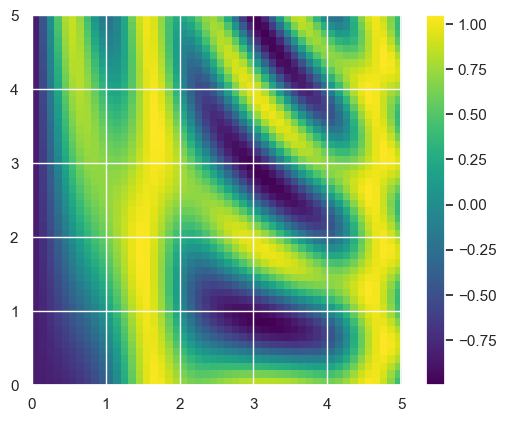

In [323]:
plt.imshow(z, origin="lower", extent=[0, 5, 0, 5], cmap="viridis")
plt.colorbar()
plt.show()

# Comparisons, Masks, and Boolean Logic

## Example: Counting Rainy Days

In [327]:
import numpy as np
import pandas as pd

rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254 # 1/10mm -> inches

print(type(inches))
print(inches.shape)

<class 'numpy.ndarray'>
(365,)


In [334]:
inches[:10]

array([0.        , 0.16141732, 0.05905512, 0.        , 0.        ,
       0.01181102, 0.48031496, 0.38188976, 0.22834646, 0.16929134])

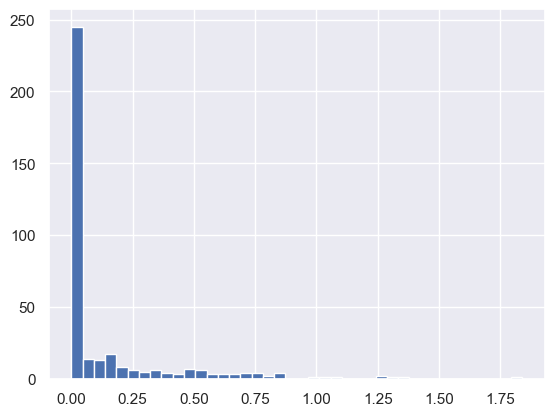

In [331]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

plt.hist(inches, 40)
plt.show()

## Comparison Operators as ufuncs

In [335]:
x = np.arange(1, 6); x

array([1, 2, 3, 4, 5])

In [342]:
print("x < 3 : ", x < 3)
print("x > 3 : ", x > 3)
print("x <= 3: ", x <= 3)
print("x >= 3: ", x >= 3)
print("x != 3: ", x != 3)
print("x == 3: ", x == 3)

x < 3 :  [ True  True False False False]
x > 3 :  [False False False  True  True]
x <= 3:  [ True  True  True False False]
x >= 3:  [False False  True  True  True]
x != 3:  [ True  True False  True  True]
x == 3:  [False False  True False False]


In [341]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

<img src="images/comparison-operations.png" width="400"/>

In [343]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [344]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

## Working with Boolean Arrays

### Counting entries

In [345]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [346]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

In [347]:
np.sum(x < 6)

8

In [349]:
np.sum(x < 6, axis=1)

array([4, 2, 2])

In [359]:
print(x > 8)
np.any(x > 8)

[[False False False False]
 [False  True False False]
 [False False False False]]


True

In [358]:
print(x < 0)
np.any(x < 0)

[[False False False False]
 [False False False False]
 [False False False False]]


False

In [357]:
print(x < 10)
np.all(x < 10)

[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]


True

In [356]:
print(x == 6)
np.all(x == 6)

[[False False False False]
 [False False False False]
 [False False False  True]]


False

In [355]:
print(x < 6)
np.all(x < 6, axis=1)

[[ True  True  True  True]
 [False False  True  True]
 [ True  True False False]]


array([ True, False, False])

### Boolean operators

In [360]:
import numpy as np
import pandas as pd

rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254 # 1/10mm -> inches

print(type(inches))
print(inches.shape)

<class 'numpy.ndarray'>
(365,)


In [361]:
# To get the number of days with inches > 0.5 and inches < 1
np.sum((inches > 0.5) & (inches < 1))

29

<img src="images/bitwise-operations.png" width="300"/>

In [370]:
print("Number of days without rain         :", np.sum(inches == 0))
print("Number of days with rain            :", np.sum(inches != 0))
print("Days with more than 0.5 inches      :", np.sum(inches > 0.5))
print("Rainy days with less than 0.1 inches:", np.sum((inches > 0) & 
                                                      (inches < 0.2)))

Number of days without rain         : 215
Number of days with rain            : 150
Days with more than 0.5 inches      : 37
Rainy days with less than 0.1 inches: 75


## Boolean Arrays as Masks

In [371]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [372]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

In [373]:
x[x < 5]

array([0, 3, 3, 3, 2, 4])

In [378]:
rainy = inches > 0
rainy

array([False,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True,  True, False,  True,  True, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False, False,  True,
        True,  True,  True,  True, False,  True, False, False, False,
       False, False,  True,  True,  True,  True,  True, False, False,
       False, False,  True, False,  True, False, False,  True, False,
       False, False, False, False, False,  True,  True,  True, False,
        True, False,  True,  True,  True,  True, False,  True,  True,
       False, False, False, False, False,  True,  True,  True, False,
       False,  True,

In [377]:
summer = (np.arange(365) - 172 > 0) & (np.arange(365) - 172 < 90)
summer

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [388]:
print("Median precip on rainy days in 2014 (inches)    :",
      np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches)   :",
      np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches)  :",
      np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches) :",
      np.median(inches[~summer & rainy]))
print("Number of days in summer where rain occurred    :",
      np.sum(summer & rainy))
print("Number of days in summer where rain didn't occur:",
      np.sum(summer & ~rainy))

Median precip on rainy days in 2014 (inches)    : 0.19488188976377951
Median precip on summer days in 2014 (inches)   : 0.0
Maximum precip on summer days in 2014 (inches)  : 0.8503937007874016
Median precip on non-summer rainy days (inches) : 0.20078740157480315
Number of days in summer where rain occurred    : 14
Number of days in summer where rain didn't occur: 75


# (TODO) Fancy Indexing

# Sorting Arrays

## Selection Sort

In [403]:
import numpy as np
def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

np.random.seed(42)
x = np.arange(10)
np.random.shuffle(x)
selection_sort(x)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Bogo Sort

In [402]:
def bogosort(x):
    while np.any(x[:-1] > x[1:]):
        np.random.shuffle(x)
    return x

np.random.seed(42)
x = np.arange(10)
np.random.shuffle(x)
bogosort(x)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## np.sort and np.argsort

In [ ]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x)

In [404]:
# Inplace sort
x.sort()
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [409]:
# argsort returns the indices of the sorted elements
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
i

array([1, 0, 3, 2, 4])

In [408]:
# Fancy indexing
x[i]

array([1, 2, 3, 4, 5])

### Sorting along rows or columns

In [410]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
X

array([[6, 3, 7, 4, 6, 9],
       [2, 6, 7, 4, 3, 7],
       [7, 2, 5, 4, 1, 7],
       [5, 1, 4, 0, 9, 5]])

In [411]:
# sort each column of X
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [412]:
# sort each column of X
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

## Partial Sorts: Partitioning

In [422]:
x = np.arange(20)
np.random.shuffle(x)
np.partition(x, 6)

array([ 4,  2,  5,  0,  1,  3,  6,  9,  8, 10,  7, 11, 19, 18, 13, 14, 15,
       12, 16, 17])

In [423]:
X

array([[6, 3, 7, 4, 6, 9],
       [2, 6, 7, 4, 3, 7],
       [7, 2, 5, 4, 1, 7],
       [5, 1, 4, 0, 9, 5]])

In [424]:
np.partition(X, 2, axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

## Example: k-Nearest Neighbors

In [476]:
rand = np.random.RandomState(42)
N = 10
K = 2
X = rand.rand(N, 2)
X

array([[0.37454012, 0.95071431],
       [0.73199394, 0.59865848],
       [0.15601864, 0.15599452],
       [0.05808361, 0.86617615],
       [0.60111501, 0.70807258],
       [0.02058449, 0.96990985],
       [0.83244264, 0.21233911],
       [0.18182497, 0.18340451],
       [0.30424224, 0.52475643],
       [0.43194502, 0.29122914]])

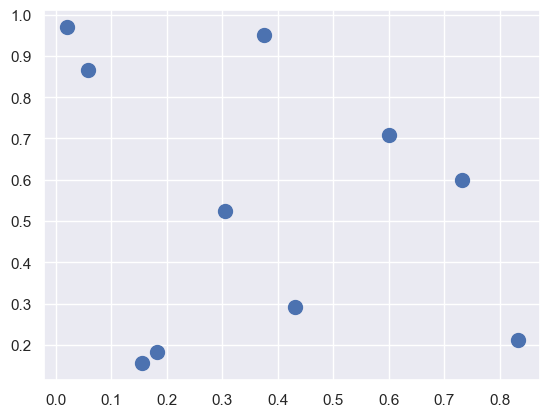

In [477]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # Plot styling

plt.scatter(X[:, 0], X[:, 1], s=100);

In [478]:
Xa = X[:, np.newaxis, :]
Xb = X[np.newaxis, :, :]

differences = Xa - Xb
sq_differences = differences ** 2
display(sq_differences.shape)

sq_distances = sq_differences.sum(axis=-1)
display(sq_distances.shape)

display(sq_distances.diagonal())

(10, 10, 2)

(10, 10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

**Example with three points**
```
X =
[
  [x1, y1],
  [x2, y2],
  [x3, y3]
]
X.shape = (3, 2)

Xa = X[:, np.newaxis, :]
Xb = X[np.newaxis, :, :]
Xa.shape = (3, 1, 2)
Xb.shape = (1, 3, 2)

Xa =
[
  [[x1, y1]],
  [[x2, y2]],
  [[x3, y3]]
]
Xb =
[
  [
    [x1, y1],
    [x2, y2],
    [x3, y3]
  ]
]

Xa - Xb
By broadcasting
Xa.shape -> (3, 3, 2)
Xb.shape -> (3, 3, 2)

Xa ->
[
  [
    [x1, y1],
    [x1, y1],
    [x1, y1]
  ],
  [
    [x2, y2],
    [x2, y2],
    [x2, y2]
  ],
  [
    [x3, y3],
    [x3, y3],
    [x3, y3]
  ]
]
Xb ->
[
  [
    [x1, y1],
    [x2, y2],
    [x3, y3]
  ],
  [
    [x1, y1],
    [x2, y2],
    [x3, y3]
  ],
  [
    [x1, y1],
    [x2, y2],
    [x3, y3]
  ]
]
differences = Xa - Xb =
[
  [
    [x1 - x1, y1 - y1],
    [x1 - x2, y1 - y2],
    [x1 - y3, y1 - y3]
  ],
  [
    [x2 - x1, y2 - y1],
    [x2 - x2, y2 - y2],
    [x2 - y3, y2 - y3]
  ],
  [
    [x3 - x1, y3 - y1],
    [x3 - x2, y3 - y2],
    [x3 - y3, y3 - y3]
  ]
]
sq_differences = differences ** 2 =
[
  [
    [(x1 - x1)^2, (y1 - y1)^2],
    [(x1 - x2)^2, (y1 - y2)^2],
    [(x1 - y3)^2, (y1 - y3)^2]
  ],
  [
    [(x2 - x1)^2, (y2 - y1)^2],
    [(x2 - x2)^2, (y2 - y2)^2],
    [(x2 - y3)^2, (y2 - y3)^2]
  ],
  [
    [(x3 - x1)^2, (y3 - y1)^2],
    [(x3 - x2)^2, (y3 - y2)^2],
    [(x3 - y3)^2, (y3 - y3)^2]
  ]
]
sq_distances = sq_differences.sum(axis=-1) =
[
  [
    (x1 - x1)^2 + (y1 - y1)^2,
    (x1 - x2)^2 + (y1 - y2)^2,
    (x1 - y3)^2 + (y1 - y3)^2
  ],
  [
    (x2 - x1)^2 + (y2 - y1)^2,
    (x2 - x2)^2 + (y2 - y2)^2,
    (x2 - y3)^2 + (y2 - y3)^2
  ],
  [
    (x3 - x1)^2 + (y3 - y1)^2,
    (x3 - x2)^2 + (y3 - y2)^2,
    (x3 - y3)^2 + (y3 - y3)^2
  ]
] =
[
  [ 0,                         (x1 - x2)^2 + (y1 - y2)^2, (x1 - y3)^2 + (y1 - y3)^2 ],
  [ (x2 - x1)^2 + (y2 - y1)^2, 0,                         (x2 - y3)^2 + (y2 - y3)^2 ],
  [ (x3 - x1)^2 + (y3 - y1)^2, (x3 - x2)^2 + (y3 - y2)^2, 0                         ]
]
sq_distances.shape = (3, 3)
```

In [479]:
print("Squared distances:")
print(sq_distances)

nearest_partition = np.argpartition(sq_distances, K, axis=1)[:, :K+1]
print(nearest_partition)

Squared distances:
[[0.         0.25171654 0.67933117 0.10729142 0.11021119 0.12565305
  0.75487265 0.62590345 0.1863819  0.43821601]
 [0.25171654 0.         0.52769893 0.52572083 0.02910074 0.64393098
  0.1593326  0.47512176 0.18843303 0.18454216]
 [0.67933117 0.52769893 0.         0.51394921 0.50290096 0.68080058
  0.46072414 0.00141727 0.15795558 0.09442377]
 [0.10729142 0.52572083 0.51394921 0.         0.31987984 0.01216687
  1.02713477 0.48148903 0.17716149 0.47033641]
 [0.11021119 0.02910074 0.50290096 0.31987984 0.         0.40557444
  0.29926414 0.45108072 0.12173825 0.20237694]
 [0.12565305 0.64393098 0.68080058 0.01216687 0.40557444 0.
  1.23302708 0.64458914 0.27862329 0.62982499]
 [0.75487265 0.1593326  0.46072414 1.02713477 0.29926414 1.23302708
  0.         0.42414057 0.37660024 0.16662198]
 [0.62590345 0.47512176 0.00141727 0.48148903 0.45108072 0.64458914
  0.42414057 0.         0.13150712 0.07418619]
 [0.1863819  0.18843303 0.15795558 0.17716149 0.12173825 0.27862329
 

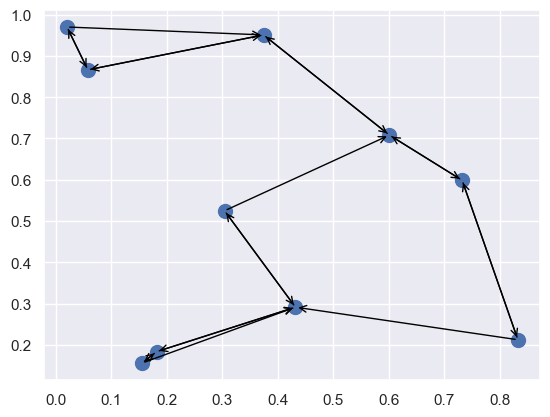

In [480]:
# Plot the points and draw lines to its two nearest neighbours
plt.scatter(X[:, 0], X[:, 1], s=100)

for i in range(N):
    # get nearest K+1 points (because that includes itself, we need K+1 points)
    nearest_points = nearest_partition[i]
    for j in nearest_points:
        # draw an arrow from X[i] to X[j]
        if i != j:
            plt.annotate("", xy=X[j], xytext=X[i],
                 arrowprops=dict(arrowstyle="->", color='black'))

# Structured Data: NumPy’s Structured Arrays

## Introduction

- We can create a structured array using a compound data type specification

In [488]:
# Use a compound data type for structured arrays
dtype={ 'names':('name', 'age', 'weight'), 'formats':('U10', 'i4', 'f8') }
data = np.zeros(4, dtype=dtype)

display(data.dtype)
display(data.shape)

dtype([('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

(4,)

In [489]:
data["name"] = ['Alice', 'Bob', 'Cathy', 'Doug']
data["age"] = [25, 45, 37, 19]
data["weight"] = [55.0, 85.5, 68.0, 61.5]

data

array([('Alice', 25, 55. ), ('Bob', 45, 85.5), ('Cathy', 37, 68. ),
       ('Doug', 19, 61.5)],
      dtype=[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

In [490]:
# Get all names
data["name"]

array(['Alice', 'Bob', 'Cathy', 'Doug'], dtype='<U10')

In [491]:
# Get first data point
data[0]

('Alice', 25, 55.)

In [492]:
# Get the name from the last data point
data[-1]['name']

'Doug'

In [496]:
# Get names where age is under 30
# Boolean masking
print(data['age'] < 30)
print(data[data['age'] < 30])
print(data[data['age'] < 30]["name"])

[ True False False  True]
[('Alice', 25, 55. ) ('Doug', 19, 61.5)]
['Alice' 'Doug']


## Creating Structured Arrays

<img src="images/datatypes-structured-data.png" width="400"/>

## Pandas - A Better Choice

- Structured arrays like the ones discussed here are good to know about for certain situations, especially
in case you’re using NumPy arrays to map onto binary data formats in C, Fortran, or
another language.
- For day-to-day use of structured data, the Pandas package is a
much better choice.